In [1]:
import numpy as np;import pandas as pd;from sklearn.preprocessing import LabelEncoder
cancer=pd.read_csv(r'C:\Users\SONY\Desktop\NumPy\wdbc.data',header=None)
X=cancer.iloc[:,2:]  ##Training set
y=cancer.iloc[:,1]  ###Labels
le=LabelEncoder()
y=le.fit_transform(y)


In [2]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)


In [3]:
from sklearn.linear_model import LogisticRegression;from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA;from sklearn.pipeline import make_pipeline;from sklearn.metrics import accuracy_score
pipeL=make_pipeline(StandardScaler(),PCA(n_components=2),LogisticRegression(random_state=1))
modelo=pipeL.fit(X_train,y_train)
y_predict=modelo.predict(X_test)
accuracy_score(y_test,y_predict)

0.956140350877193

In [4]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(pipeL,X=X_train,y=y_train,cv=10,n_jobs=-1)


In [5]:
mean=np.mean(scores)
std=np.std(scores)
f'Media: {mean:.3f} +/- {std:.3f}'


'Media: 0.950 +/- 0.014'

In [6]:
import matplotlib.pyplot as plt;import seaborn as sns;sns.set();from sklearn.model_selection import learning_curve
estimator=make_pipeline(StandardScaler(),LogisticRegression(random_state=1))



In [ ]:
train_size,train_score,test_score=learning_curve(estimator=estimator,X=X_train,y=y_train,cv=10,n_jobs=-1,
                                                train_sizes=np.linspace(0.1,1,10))

In [ ]:
train_score_mean=np.mean(train_score,axis=1)
test_score_mean=np.mean(test_score,axis=1)
plt.style.use('fivethirtyeight')
plt.plot(train_size,train_score_mean,marker='o',label='Trainig Accuracy',linestyle='--')
plt.plot(train_size,test_score_mean,marker='x',label='Validation Accuracy')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Presición')
plt.title('Learning Curve')
plt.legend()
plt.ylim(0.8,1.01)

### Según la curva de aprendizaje se obtiene una buena precisión si el conjunto de datos de entrenamiento tiene una cantidad de muestras de 250 o superior

In [7]:
from sklearn.model_selection import validation_curve
parametro_C=[0.001,0.01,0.1,1,10,100,100]
train_score,test_score=validation_curve(estimator=estimator,X=X_train,y=y_train,param_name='logisticregression__C',
                                        param_range=parametro_C,cv=10,n_jobs=-1)
train_score_m=np.mean(train_score,axis=1);
train_score_std=np.std(train_score,axis=1)
test_score_m=np.mean(test_score,axis=1);
test_score_std=np.std(test_score,axis=1);


Text(0.5, 1.0, 'Validation Curve')

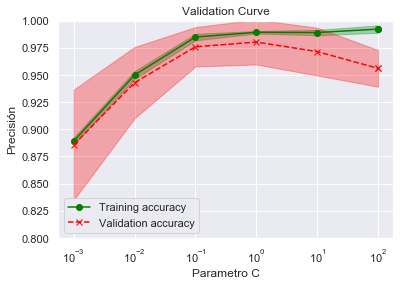

In [8]:
plt.style.use('seaborn-bright')
plt.plot(parametro_C,train_score_m,color='green',label='Training accuracy',marker='o')
plt.plot(parametro_C,test_score_m,color='red',label='Validation accuracy',marker='x',linestyle='--')
plt.legend()

plt.fill_between(parametro_C,train_score_m-train_score_std,train_score_m+train_score_std,alpha=0.3,color='green')
plt.fill_between(parametro_C,test_score_m-test_score_std,test_score_m+test_score_std,alpha=0.3,color='red')

plt.ylim(0.8,1)
plt.xscale('log')
plt.xlabel('Parametro C');plt.ylabel('Precisión');plt.title('Validation Curve')

### Se observa de la curva de validación que valores pequeños del parametro C produce como resultado underfitting tanto en el conjunto de entrenamiento como en el de validación. Para valores altos de C se produce exactamente lo contrario (Overfitting). Al parecer el valor adecuado para C se situa entre 0.1 y 1.

In [ ]:
from LearningCurve import curves
curves.plot_learning_curve(train_score,test_score,train_size)

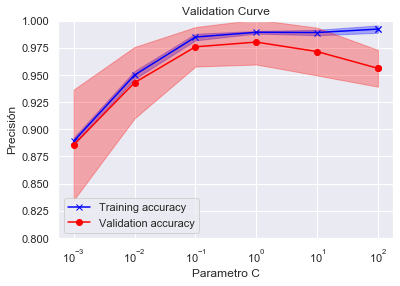

In [9]:
from ValidationCurve import curves
curves.plot_validation_curve(train_score,test_score,parametro_C,'Parametro C')